In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columns = ['age','workclass','fnlgwt','education','ednum','maritalstatus','occupation','relationship',
           'race','sex','capitalgain','capitalloss','hoursperweek','country','income']

# fnlgwt: final weight

In [3]:
train_data = pd.read_csv('adult-training.csv', names=columns)
test_data = pd.read_csv('adult-test.csv', names=columns)

In [4]:
train_data.head()

,age,workclass,fnlgwt,education,ednum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_data.head()  # the first row is invalid

,age,workclass,fnlgwt,education,ednum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [6]:
test_data.drop(test_data.index[0], inplace=True)

In [7]:
test_data.head()

,age,workclass,fnlgwt,education,ednum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [8]:
test_data.income.str.replace('.', '').unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
# remove the leading and trailing spaces for every element
train_data = train_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)  
test_data = test_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)  

In [10]:
train_data.shape

(32561, 15)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   fnlgwt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   ednum          32561 non-null  int64 
 5   maritalstatus  32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capitalgain    32561 non-null  int64 
 11  capitalloss    32561 non-null  int64 
 12  hoursperweek   32561 non-null  int64 
 13  country        32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
train_data.describe()

,age,fnlgwt,ednum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
train_data.isna().sum()

age              0
workclass        0
fnlgwt           0
education        0
ednum            0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
country          0
income           0
dtype: int64

In [14]:
train_data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
train_data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [16]:
train_data.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
train_data.country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [18]:
train_data.maritalstatus.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalstatus, dtype: int64

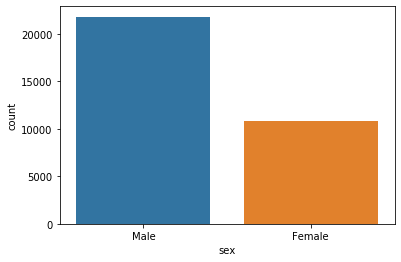

In [19]:
sns.countplot(train_data.sex)

In [20]:
train_data.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [21]:
train_data.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [22]:
train_data.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [23]:
train_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [24]:
train_data.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [25]:
train_data['income'] = train_data.income.map({'<=50K': 1, '>50K': 0}).astype('int32')

In [26]:
test_data['income'] = test_data.income.str.replace('.', '')

In [27]:
test_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [28]:
test_data['income'] = test_data.income.map({'<=50K': 1, '>50K': 0}).astype('int32')

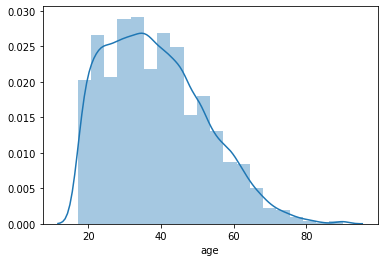

In [29]:
sns.distplot(train_data.age, bins=20)

Drop `fnlgwt` column from the training and test datasets

In [30]:
train_data.columns

Index(['age', 'workclass', 'fnlgwt', 'education', 'ednum', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'country', 'income'],
      dtype='object')

In [31]:
train_data.drop(['fnlgwt', 'country', 'education'], axis=1, inplace=True)
test_data.drop(['fnlgwt', 'country', 'education'], axis=1, inplace=True)

In [32]:
train_data.head()

,age,workclass,ednum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1


`age` and `ednum` are numerical. We can convert them into more efficient way, `age` can be converted into times of **10** and `ednum` can be converted to times of **5**.

In [33]:
labels = ["{0}-{1}".format(i, i + 9) for i in range(0, 100, 10)]
labels

['0-9',
 '10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99']

In [34]:
train_data['agegroup'] = pd.cut(train_data.age, bins=range(0, 101, 10), right=False, labels=labels)

In [35]:
test_data.age.dtypes

dtype('O')

In [36]:
test_data['agegroup'] = pd.cut(test_data.age.astype('int32'), bins=range(0, 101, 10), right=False, labels=labels)

In [37]:
labels = ["{0}-{1}".format(i, i + 4) for i in range(0, 20, 5)]
train_data['edgroup'] = pd.cut(train_data.ednum, bins=range(0, 21, 5), right=False, labels=labels)
test_data['edgroup'] = pd.cut(test_data.ednum, bins=range(0, 21, 5), right=False, labels=labels)

In [38]:
train_data.head()

,age,workclass,ednum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,income,agegroup,edgroup
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,30-39,10-14
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,50-59,10-14
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,30-39,5-9
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1,50-59,5-9
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1,20-29,10-14


In [39]:
# plt.bar(train_data.edgroup, train_data.income)

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

In [41]:
mapper = DataFrameMapper([('agegroup', LabelEncoder()),
                          ('edgroup', LabelEncoder()),
                          ('workclass', LabelEncoder()),
                          ('maritalstatus', LabelEncoder()),
                          ('occupation', LabelEncoder()),
                          ('relationship', LabelEncoder()),
                          ('race', LabelEncoder()),
                          ('sex', LabelEncoder())], 
                         df_out=True, 
                         default=None)

In [42]:
df_train = mapper.fit_transform(train_data.copy())
df_test = mapper.fit_transform(test_data.copy())

In [43]:
df_train.head()

,agegroup,edgroup,workclass,maritalstatus,occupation,relationship,race,sex,age,ednum,capitalgain,capitalloss,hoursperweek,income
0,2,1,7,4,1,1,4,1,39,13,2174,0,40,1
1,4,1,6,2,4,0,4,1,50,13,0,0,13,1
2,2,3,4,0,6,1,4,1,38,9,0,0,40,1
3,4,3,4,2,6,0,2,1,53,7,0,0,40,1
4,1,1,4,2,10,5,2,0,28,13,0,0,40,1


In [44]:
df_train.drop(['ednum', 'age'], axis=1, inplace=True)
df_test.drop(['ednum', 'age'], axis=1, inplace=True)
df_train.head()

,agegroup,edgroup,workclass,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,income
0,2,1,7,4,1,1,4,1,2174,0,40,1
1,4,1,6,2,4,0,4,1,0,0,13,1
2,2,3,4,0,6,1,4,1,0,0,40,1
3,4,3,4,2,6,0,2,1,0,0,40,1
4,1,1,4,2,10,5,2,0,0,0,40,1


In [45]:
df_train[['capitalgain', 'capitalloss', 'hoursperweek']] = df_train[['capitalgain', 'capitalloss', 'hoursperweek']]\
    .astype('int64')
df_test[['capitalgain', 'capitalloss', 'hoursperweek']] = df_test[['capitalgain', 'capitalloss', 'hoursperweek']]\
    .astype('int64')

df_train['income'] = df_train['income'].astype('int64')
df_test['income'] = df_test['income'].astype('int64')

In [46]:
df_train.dtypes

agegroup         int32
edgroup          int32
workclass        int32
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
income           int64
dtype: object

In [47]:
x_train, y_train = df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values
x_test, y_test = df_test.iloc[:, :-1].values, df_test.iloc[:, -1].values

## 1. DecisionTree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtreeclf = DecisionTreeClassifier()

In [50]:
dtreeclf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [52]:
dtreeclf.score(x_test, y_test)

0.8264234383637369

In [53]:
y_pred = dtreeclf.predict(x_test)

In [54]:
cfm = confusion_matrix(y_test, y_pred) # '<=50K': 1, '>50K': 0
cfm = cfm/np.sum(cfm)
cfm

array([[0.1534918 , 0.08273448],
       [0.09084209, 0.67293164]])

Text(0.5, 1, 'confusion_matrix')

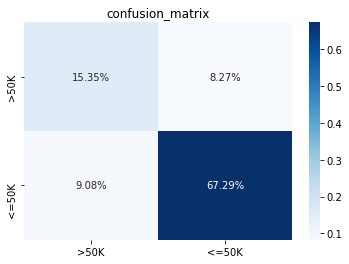

In [55]:
ticks = ['>50K', '<=50K']
sns.heatmap(cfm, cmap="Blues", annot=True, fmt=".2%",
            xticklabels=ticks, yticklabels=ticks)\
    .set_title('confusion_matrix')

In [56]:
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score', precision_score(y_test, y_pred))
print('Recall score', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy score: 0.8264234383637369
Precision score 0.8905145086564252
Recall score 0.8810615199034982
F1 score: 0.8857627940819792


### Improve the accuracy of the model using cross validation

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters = {'max_features':(None, 9, 6),
              'max_depth':(None, 24, 16),
              'min_samples_split': (2, 4, 8),
              'min_samples_leaf': (16, 4, 12)}

In [59]:
clf = GridSearchCV(dtreeclf, parameters, cv=5, n_jobs=4)

In [60]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': (None, 24, 16),
                         'm

In [61]:
clf.best_score_

0.8580511817038763

In [62]:
clf.score(x_test, y_test)

0.8589153000429949

In [63]:
clf.best_params_

{'max_depth': 16,
 'max_features': None,
 'min_samples_leaf': 16,
 'min_samples_split': 4}

In [64]:
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cfm = cfm/np.sum(cfm)

Text(0.5, 1, 'confusion_matrix')

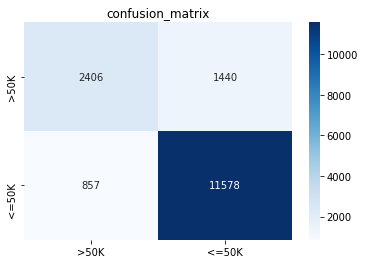

In [66]:
ticks = ['>50K', '<=50K']
sns.heatmap(cfm, cmap="Blues",annot=True,fmt="d",xticklabels=ticks,yticklabels=ticks).set_title('confusion_matrix')

## 2. Randomforest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rclf = RandomForestClassifier(n_estimators=500)
rclf.fit(x_train, y_train)
rclf.score(x_test, y_test)

0.8512376389656655

In [69]:
importances = rclf.feature_importances_
importances

array([0.09757522, 0.07811165, 0.06393382, 0.09368683, 0.11051966,
       0.13534804, 0.02582652, 0.0145115 , 0.17055278, 0.0589753 ,
       0.15095867])

Text(0.5, 0, 'Relative Importance')

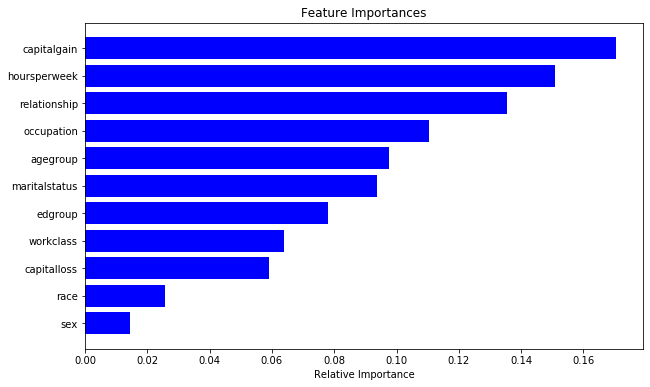

In [70]:
indices = np.argsort(importances)
cols = df_train.iloc[:, :-1].columns
cols = [cols[x] for x in indices]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), cols)
plt.xlabel('Relative Importance')

In [71]:
parameters = {'n_estimators':(100, 500, 1000),
              'max_depth':(None, 24, 16),
              'min_samples_split': (2, 4, 8),
              'min_samples_leaf': (16, 4, 12)}

In [72]:
# clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=8)
# clf.fit(x_train, y_train)

In [73]:
# clf.best_score_

In [74]:
# clf.best_params_

In [75]:
rclf2 = RandomForestClassifier(n_estimators=1000,max_depth=24,min_samples_leaf=4,min_samples_split=8)
rclf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 1, 'confusion_matrix')

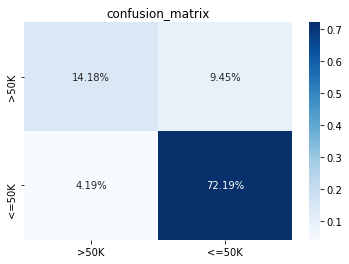

In [77]:
y_pred = rclf2.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cfm = cfm/np.sum(cfm)
ticks = ['>50K', '<=50K']
sns.heatmap(cfm, cmap="Blues",annot=True,fmt=".2%",xticklabels=ticks,yticklabels=ticks).set_title('confusion_matrix')

Text(0.5, 0, 'Relative Importance')

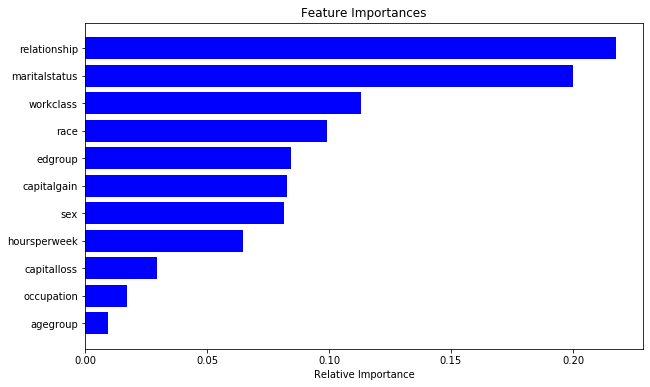

In [78]:
importances = rclf2.feature_importances_
indices = np.argsort(importances)
cols = [cols[x] for x in indices]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), cols)
plt.xlabel('Relative Importance')

## 3. LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

**Standardization** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: **Gaussian with zero mean and unit variance**.

Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [89]:
scaler = StandardScaler().fit(x_train)

In [95]:
scaler.mean_

array([2.41055250e+00, 1.82623384e+00, 3.86889223e+00, 2.61183625e+00,
       6.57274039e+00, 1.44636221e+00, 3.66585793e+00, 6.69205491e-01,
       1.07764884e+03, 8.73038297e+01, 4.04374559e+01])

In [96]:
scaler.scale_

array([1.39980446e+00, 1.02460188e+00, 1.45593740e+00, 1.50619859e+00,
       4.22879187e+00, 1.60674628e+00, 8.48792570e-01, 4.70499205e-01,
       7.38517868e+03, 4.02954031e+02, 1.23472391e+01])

In [92]:
xx_train = scaler.transform(x_train)
xx_test = scaler.transform(x_test)

In [97]:
xx_train

array([[-0.29329275, -0.80639501,  2.15057856, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [ 1.13547823, -0.80639501,  1.46373585, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.29329275,  1.14558268,  0.09005041, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [ 1.13547823,  1.14558268,  0.09005041, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-1.00767824,  1.14558268,  0.09005041, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [ 1.13547823,  1.14558268,  0.77689313, ...,  1.88842434,
        -0.21665953, -0.03542945]])

In [84]:
logr_clf = LogisticRegression(class_weight='balanced')

In [91]:
logr_clf.fit(xx_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
logr_clf.score(xx_test, y_test)

0.7363798292488176

Text(0.5, 1, 'confusion_matrix')

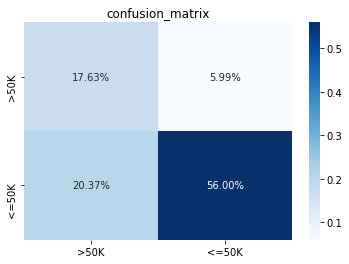

In [94]:
y_pred = logr_clf.predict(xx_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cfm = cfm/np.sum(cfm)
ticks = ['>50K', '<=50K']
sns.heatmap(cfm, cmap="Blues",annot=True,fmt=".2%",xticklabels=ticks,yticklabels=ticks).set_title('confusion_matrix')